In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
#plt.style.use('seaborn')
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import numpy as np

In [22]:

# Define the tickers and the time period
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2023-10-01'

# Load the data
data = yf.download(tickers, start=start_date, end=end_date)
data.head()

[*********************100%***********************]  3 of 3 completed


Price                      Adj Close                             Close  \
Ticker                           BND         SPY       TSLA        BND   
Date                                                                     
2015-01-02 00:00:00+00:00  63.358776  173.173752  14.620667  82.650002   
2015-01-05 00:00:00+00:00  63.542759  170.046341  14.006000  82.889999   
2015-01-06 00:00:00+00:00  63.726719  168.444641  14.085333  83.129997   
2015-01-07 00:00:00+00:00  63.765026  170.543625  14.063333  83.180000   
2015-01-08 00:00:00+00:00  63.665443  173.569977  14.041333  83.050003   

Price                                                  High              \
Ticker                            SPY       TSLA        BND         SPY   
Date                                                                      
2015-01-02 00:00:00+00:00  205.429993  14.620667  82.690002  206.880005   
2015-01-05 00:00:00+00:00  201.720001  14.006000  82.919998  204.369995   
2015-01-06 00:00:00+00:00  199.820007  14.085333  83.379997  202.720001   
2015-01-07 00:00:00+00:00  202.309998  14.063333  83.279999  202.720001   
2015-01-08 00:00:00+00:00  205.899994  14.041333  83.110001  206.160004   

Price                                       Low                         \
Ticker                          TSLA        BND         SPY       TSLA   
Date                                                                     
2015-01-02 00:00:00+00:00  14.883333  82.419998  204.179993  14.217333   
2015-01-05 00:00:00+00:00  14.433333  82.699997  201.350006  13.810667   
2015-01-06 00:00:00+00:00  14.280000  83.029999  198.860001  13.614000   
2015-01-07 00:00:00+00:00  14.318667  83.050003  200.880005  13.985333   
2015-01-08 00:00:00+00:00  14.253333  82.970001  203.990005  14.000667   

Price                           Open                          Volume  \
Ticker                           BND         SPY       TSLA      BND   
Date                                                                   
2015-01-02 00:00:00+00:00  82.430000  206.380005  14.858000  2218800   
2015-01-05 00:00:00+00:00  82.739998  204.169998  14.303333  5820100   
2015-01-06 00:00:00+00:00  83.029999  202.089996  14.004000  3887600   
2015-01-07 00:00:00+00:00  83.139999  201.419998  14.223333  2433400   
2015-01-08 00:00:00+00:00  83.110001  204.009995  14.187333  1873400   

Price                                           
Ticker                           SPY      TSLA  
Date                                            
2015-01-02 00:00:00+00:00  121465900  71466000  
2015-01-05 00:00:00+00:00  169632600  80527500  
2015-01-06 00:00:00+00:00  209151400  93928500  
2015-01-07 00:00:00+00:00  125346700  44526000  
2015-01-08 00:00:00+00:00  147217800  51637500

In [23]:
# Check basic statistics
print(data.describe())

Price     Adj Close                                  Close               \
Ticker          BND          SPY         TSLA          BND          SPY   
count   2201.000000  2201.000000  2201.000000  2201.000000  2201.000000   
mean      69.971281   285.768509    99.028659    81.306415   308.249787   
std        5.110235    90.559017   110.069706     4.468395    84.884734   
min       62.637611   157.328568     9.578000    69.379997   182.860001   
25%       66.146584   207.605530    16.565332    79.300003   234.919998   
50%       68.114983   262.314392    22.896667    81.790001   286.660004   
75%       74.040604   377.360443   203.763336    84.279999   391.559998   
max       79.812935   458.720306   409.970001    89.480003   477.709991   

Price                       High                                    Low  \
Ticker         TSLA          BND          SPY         TSLA          BND   
count   2201.000000  2201.000000  2201.000000  2201.000000  2201.000000   
mean      99.028659    8

In [33]:
# Check data types
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())

Price      Ticker
Adj Close  BND       float64
           SPY       float64
           TSLA      float64
Close      BND       float64
           SPY       float64
           TSLA      float64
High       BND       float64
           SPY       float64
           TSLA      float64
Low        BND       float64
           SPY       float64
           TSLA      float64
Open       BND       float64
           SPY       float64
           TSLA      float64
Volume     BND         int64
           SPY         int64
           TSLA        int64
dtype: object
Price      Ticker
Adj Close  BND       0
           SPY       0
           TSLA      0
Close      BND       0
           SPY       0
           TSLA      0
High       BND       0
           SPY       0
           TSLA      0
Low        BND       0
           SPY       0
           TSLA      0
Open       BND       0
           SPY       0
           TSLA      0
Volume     BND       0
           SPY       0
           TSLA      0
dtype: int64


In [25]:
# Calculate daily returns
daily_returns = data['Close'].pct_change()

# Calculate rolling volatility (standard deviation of daily returns)
rolling_volatility = daily_returns.rolling(window=30).std() * np.sqrt(252)  # Annualized volatility

**visualized closing price over time**

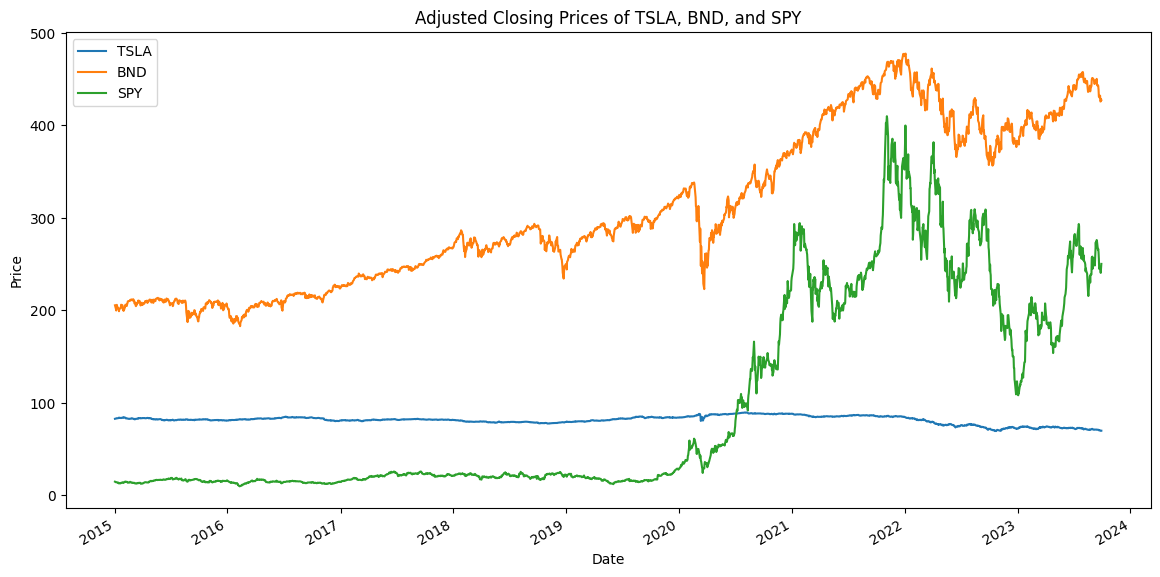

In [31]:
import matplotlib.pyplot as plt

data['Close'].plot(figsize=(14, 7))
plt.title('Adjusted Closing Prices of TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(tickers)
plt.show()

**Plot Daily Percentage Change**

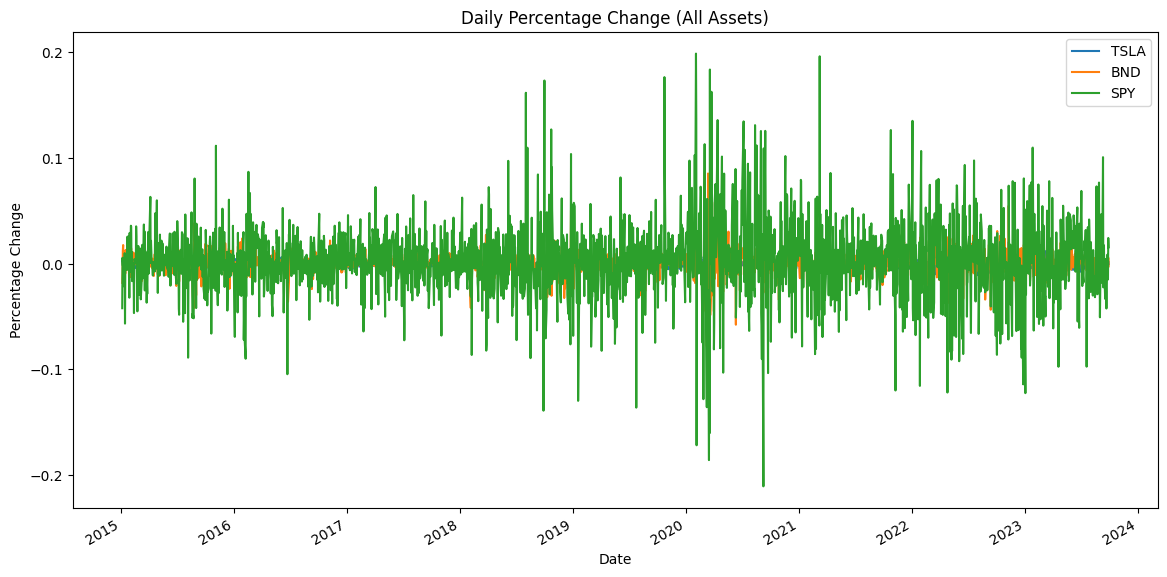

In [34]:
daily_returns.plot(figsize=(14, 7))
plt.title('Daily Percentage Change (All Assets)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend(tickers)
plt.show()

**Analyze Volatility**

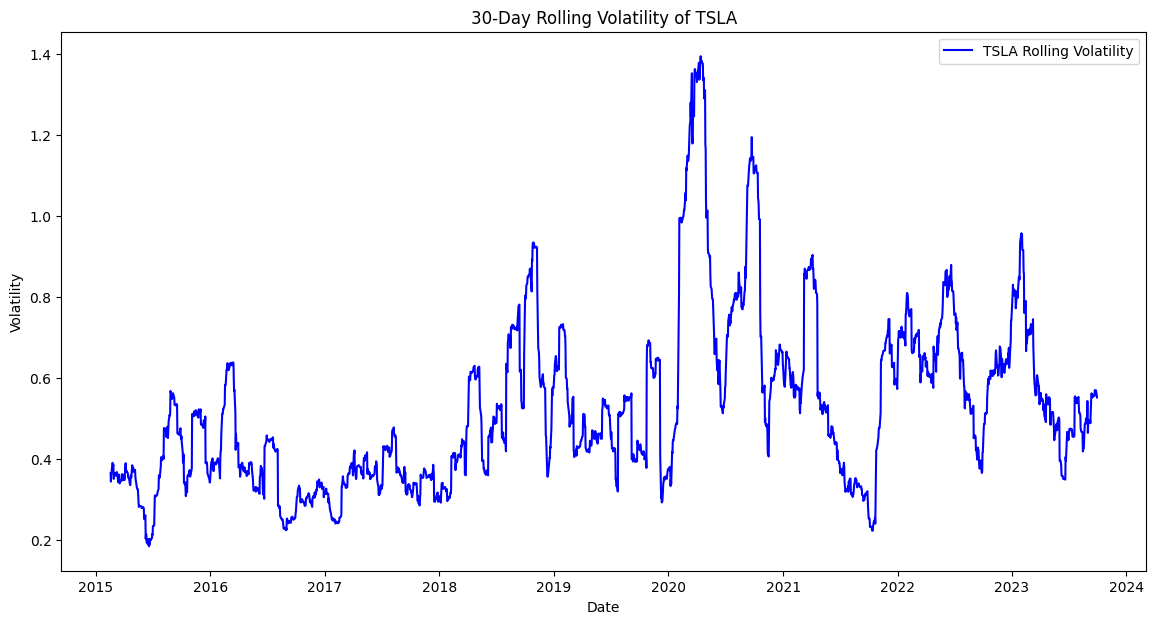

In [35]:
plt.figure(figsize=(14, 7))
plt.plot(rolling_volatility['TSLA'], label='TSLA Rolling Volatility', color='blue')
plt.title('30-Day Rolling Volatility of TSLA')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

**Outlier Detection in Daily Returns**

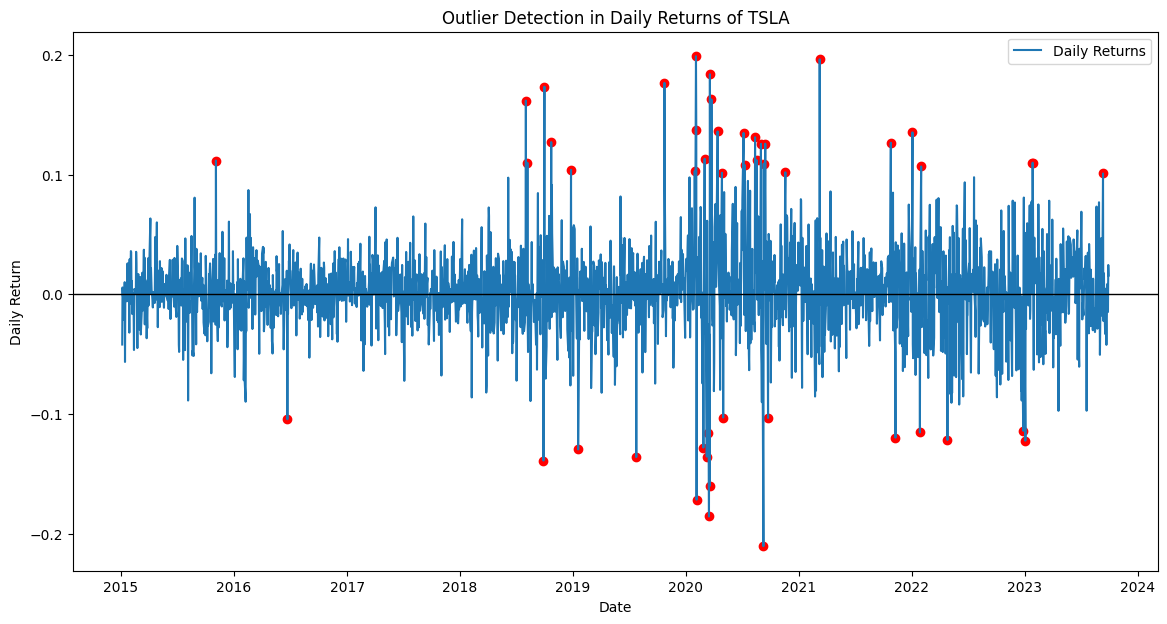

In [36]:
# Identify outliers based on daily returns
outliers = daily_returns[(daily_returns < -0.1) | (daily_returns > 0.1)]
plt.figure(figsize=(14, 7))
plt.scatter(outliers.index, outliers['TSLA'], color='red')
plt.plot(daily_returns['TSLA'], label='Daily Returns')
plt.title('Outlier Detection in Daily Returns of TSLA')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.axhline(0, color='black', lw=1)
plt.legend()
plt.show()

**Seasonality and Trends Decompose the time series for TSLA**

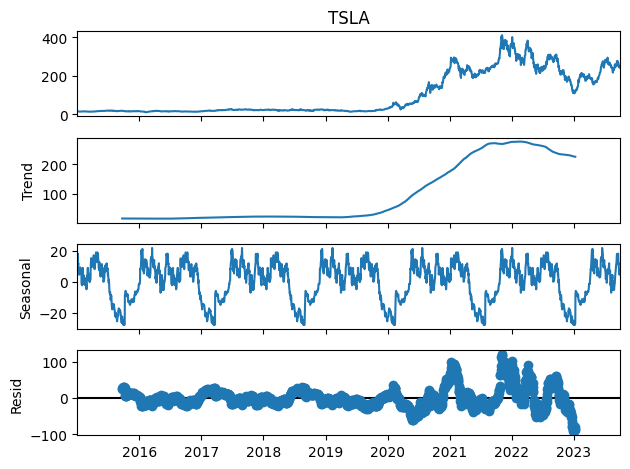

In [38]:
import statsmodels.api as sm

# Decompose TSLA's closing price
decomposition = sm.tsa.seasonal_decompose(data['Close']['TSLA'], model='additive', period=365)
fig = decomposition.plot()
plt.show()

** VaR and Sharpe Ratio**

In [39]:
# Calculate VaR
confidence_level = 0.95
VaR = np.percentile(daily_returns['TSLA'].dropna(), 100 * (1 - confidence_level))

# Calculate Sharpe Ratio
risk_free_rate = 0.01  # Example: 1% risk-free rate
sharpe_ratio = (daily_returns['TSLA'].mean() - risk_free_rate) / daily_returns['TSLA'].std()

print(f'Value at Risk (VaR): {VaR}')

Value at Risk (VaR): -0.051599684048381646
